In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/diamonds01.csv').values
print(dataset)

[[0.38 'Ideal' 'E' ... 4.67 2.91 1433]
 [1.56 'Ideal' 'F' ... 7.45 4.58 10210]
 [1.01 'Ideal' 'J' ... 6.5 4.01 4099]
 ...
 [0.25 'Very Good' 'E' ... 4.06 2.51 575]
 [0.32 'Ideal' 'I' ... 4.46 2.71 505]
 [1.31 'Ideal' 'G' ... 7.07 4.37 10556]]


In [3]:
X = dataset[:,:-1]
y = dataset[:,-1]
X = np.delete(X,[1,2,3],axis = 1)

# np.delete(ndarray, 삭제할 열 또는 행 index, axis = 0(행)/1(열))
print(X.shape)
print(y.shape)
print(X)

(5000, 6)
(5000,)
[[0.38 62.7 55.0 4.61 4.67 2.91]
 [1.56 61.6 56.0 7.41 7.45 4.58]
 [1.01 61.9 55.3 6.43 6.5 4.01]
 ...
 [0.25 62.1 58.0 4.03 4.06 2.51]
 [0.32 60.9 56.0 4.44 4.46 2.71]
 [1.31 62.0 53.0 7.06 7.07 4.37]]


In [4]:
# K-fold cross validation
from sklearn.model_selection import KFold
k = 5
kf = KFold(k)

In [5]:
kf.split(X,y)

<generator object _BaseKFold.split at 0x1460fd890>

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 3: model의 수 (simple, multiple, polynomial)
# k: the number of validation
mae = np.zeros((3,k))
mse = np.zeros((3,k))
r2 = np.zeros((3,k))

In [7]:
# kf.split(X,y) 확인
cnt = 1
for train_idx, test_idx in kf.split(X,y):
    print('count :', cnt)
    print('*train: ', train_idx)
    print('*test: ', test_idx)
    cnt += 1

count : 1
*train:  [1000 1001 1002 ... 4997 4998 4999]
*test:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pos_poly = PolynomialFeatures(degree = 2)

pLR = LinearRegression()
sLR = LinearRegression()
mLR = LinearRegression()
iter = 0

for train_idx, test_idx in kf.split(X,y):
    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx]
    y_test = y[test_idx]
    
    # 1. learning simple linear regression
    sLR.fit(X_train[:,:1],y_train) # Carat열만 추출
    y_pred_sLR = sLR.predict(X_test[:,:1])
    
    # 2. learning multiple linear regression
    mLR.fit(X_train, y_train)
    y_pred_mLR = mLR.predict(X_test)
    
    # 3. Polynomial
    X_poly = pos_poly.fit(X_train[:,[1,2,3]])
    pLR.fit(pos_poly.transform(X_train[:,[1,2,3]]),y_train)
    y_pred_pLR = pLR.predict(pos_poly.transform(X_test[:,[1,2,3]]))
    
    # 3. metrics
    # 3-1) MAE
    mae[0,iter] = mean_absolute_error(y_test,y_pred_sLR) # index = 0: simple
    mae[1,iter] = mean_absolute_error(y_test,y_pred_mLR) # index = 1: multiple
    mae[2,iter] = mean_absolute_error(y_test,y_pred_pLR) # index = 2: polonomial
    
    # 3-2) MSE
    mse[0,iter] = mean_squared_error(y_test,y_pred_sLR) # index = 0: simple
    mse[1,iter] = mean_squared_error(y_test,y_pred_mLR) # index = 1: multiple
    mse[2,iter] = mean_squared_error(y_test,y_pred_pLR) # index = 2: polonomial    
    # 3-3) R2
    r2[0,iter] = r2_score(y_test,y_pred_sLR) # index = 0: simple
    r2[1,iter] = r2_score(y_test,y_pred_mLR) # index = 1: multiple
    r2[2,iter] = r2_score(y_test,y_pred_pLR) # index = 2: polonomial    
    iter += 1


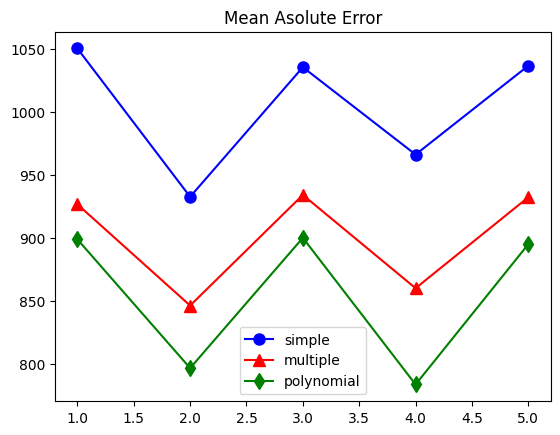

In [9]:
# 1. MAE
X= np.arange(1,k+1)
plt.plot(X,mae[0],marker='o', color='blue',markersize=8,label='simple')
plt.plot(X,mae[1],marker='^', color='red',markersize=8,label='multiple')
plt.plot(X,mae[2],marker='d', color='green',markersize=8,label='polynomial')
plt.title("Mean Asolute Error")
plt.legend()
plt.show()

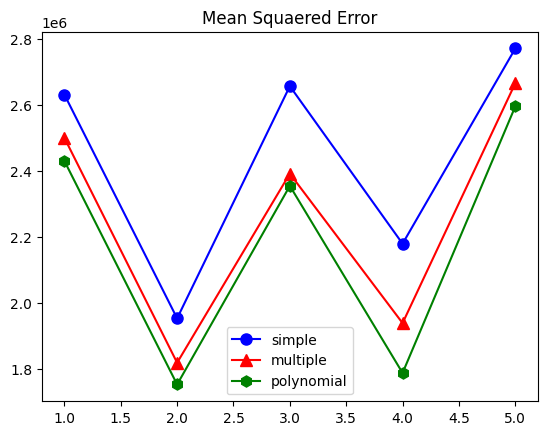

In [10]:
# 2. MSE
X= np.arange(1,k+1)
plt.plot(X,mse[0],marker='o', color='blue',markersize=8,label='simple')
plt.plot(X,mse[1],marker='^', color='red',markersize=8,label='multiple')
plt.plot(X,mse[2],marker='h', color='green',markersize=8,label='polynomial')
plt.title("Mean Squaered Error")
plt.legend()
plt.show()

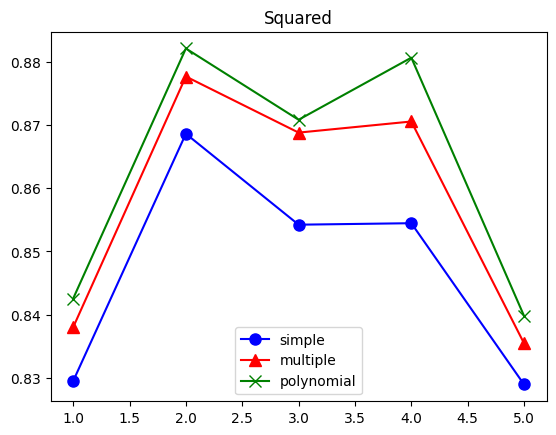

In [11]:
# 3. R2
X= np.arange(1,k+1)
plt.plot(X,r2[0],marker='o', color='blue',markersize=8,label='simple')
plt.plot(X,r2[1],marker='^', color='red',markersize=8,label='multiple')
plt.plot(X,r2[2],marker='x', color='green',markersize=8,label='polynomial')
plt.title("Squared")
plt.legend()
plt.show()